<a href="https://colab.research.google.com/github/vineeta0118/Airbnb-EDA--capstone--project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Start This journey with full of Ups and downs with some Motivational Quotes

#"Nothing is impossible. The word itself says 'I'm possible!'"
 — Audrey Hepburn




# **I know something children don’t that "no one bad is ever truly bad and no one good is ever truly good"**.                  
~ Tom Hiddleston

# We did lots of google search as well kaggle for this research analysis to see work approch of multiple data scientist .

0.1-Case study- The purpose of this case study is to analyse the pricing trend between property type and neighbourhood or any correlation between review and price



0.2-Data cleaning,transformation and Analysis

# Libraries Prepration for the Data Analysis and plot

In [1]:
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation
%matplotlib inline  

In [2]:
from google.colab import drive #connect with google drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
file_path='/content/Drive/MyDrive/Airbnb NYC 2019.csv'        #file path reading or csv upload to coolab from drive
airbnb_df=pd.read_csv(file_path)

# Data Summary

In [4]:
#read first ten rows  of data 
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
#read last ten rows  of data 
airbnb_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Road Map for data Analysis

Descriptive Analysis

Data cleaning

For host- 
Top three busiest host and also loaction wise top busiest host

For Neighbourhood-
Locations with most host listed 

Location getting maximum number of bookings on basis of reviews 

Price relation with respect to location

For reviews-
Relationship between reviews and neighbourhood

Relationship between reviews and room type

For Price-

price vs amenities

Price vs location

In [6]:
#no or row and columns we are going to deal
airbnb_df.shape

(48895, 16)

In [7]:
#Name of columns we have in our data base 
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Descriptive Analysis

In [8]:
#value through we are goin to deal
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price column showing minimum values as 0 which is due to human error and we need to inform those host to change the price Also review column has zero values which can be due to human error or property is new

In [9]:
# data information we have
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We have 10052 missing value in column such as last_review and reviews_per_month

# Start Data Cleaning

In [10]:
#drop all that column which is not useful currently for doing data analysis
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)

In [11]:
# chech how many null values are avalible in which columns
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# replacing all the null value from the zero in reviews_per_month column
airbnb_df['reviews_per_month'].fillna(0,inplace=True)    
airbnb_df['reviews_per_month']

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [13]:
#again checking null values
airbnb_df.isna().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [14]:
#find the data which have null values in name column
airbnb_df=airbnb_df.fillna({'name':'no data'})
no_name_data=airbnb_df.loc[airbnb_df['name']=='no data',['name','host_id','neighbourhood_group']]
no_name_data

,name,host_id,neighbourhood_group
2854,no data,6676776,Manhattan
3703,no data,11395220,Manhattan
5775,no data,20700823,Manhattan
5975,no data,22686810,Manhattan
6269,no data,21600904,Brooklyn
6567,no data,1832442,Brooklyn
6605,no data,24625694,Manhattan
8841,no data,31147528,Brooklyn
11963,no data,33377685,Manhattan
12824,no data,50448556,Manhattan


1-so we have 16 rows which have null value in name column:

2-Filling of these values is upto client's discretion and we will remove null values for our analysis

In [15]:
#find the data which have null values in host_name column
airbnb_df=airbnb_df.fillna({'host_name':'no data'})
no_host_data=airbnb_df.loc[airbnb_df['host_name']=='no data',['name','host_name','host_id','neighbourhood_group']]
no_host_data

,name,host_name,host_id,neighbourhood_group
360,Bienvenue,no data,526653,Queens
2700,Cozy Studio in Flatbush,no data,7779204,Brooklyn
5745,SPRING in the City!! Zen-Style Tranquil Bedroom,no data,919218,Manhattan
6075,Charming Room in Prospect Heights!,no data,23077718,Brooklyn
6582,"Luxurious, best location, spa inc'l",no data,24576978,Brooklyn
8163,Modern Quiet Gem Near All,no data,32722063,Brooklyn
8257,"Sunny, Private room in Bushwick",no data,33134899,Brooklyn
8852,R&S Modern Spacious Hideaway,no data,32722063,Brooklyn
9138,1 Bedroom in Prime Williamsburg,no data,5162530,Brooklyn
9817,Sunny Room in Harlem,no data,39608626,Manhattan


1-so we have 21 rows which have null values in host name column:

2-Filling of these values is upto client's discretion and we will remove null values for our analysis

In [16]:
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
# To check the price got changed or not
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
#in here we check there are few rows of price whis is zero dollers.so we find these rows and remove them
airbnb_df =airbnb_df[airbnb_df['price']!=0]
airbnb_df =airbnb_df[airbnb_df['host_name']!=0]

In [19]:
#the corelation among variables 
corr = airbnb_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.209752,0.154949,0.203434
latitude,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.018719,0.019518,-0.010942
longitude,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.138435,-0.114715,0.082669
price,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.050531,0.057462,0.081847
minimum_nights,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.124870,0.127962,0.144275
number_of_reviews,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.589311,-0.072385,0.171975
reviews_per_month,0.209752,-0.018719,0.138435,-0.050531,-0.124870,0.589311,1.000000,-0.047322,0.163664
calculated_host_listings_count,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.047322,1.000000,0.225712
availability_365,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.163664,0.225712,1.000000


This plot shows that there is no strong corelation among variables 

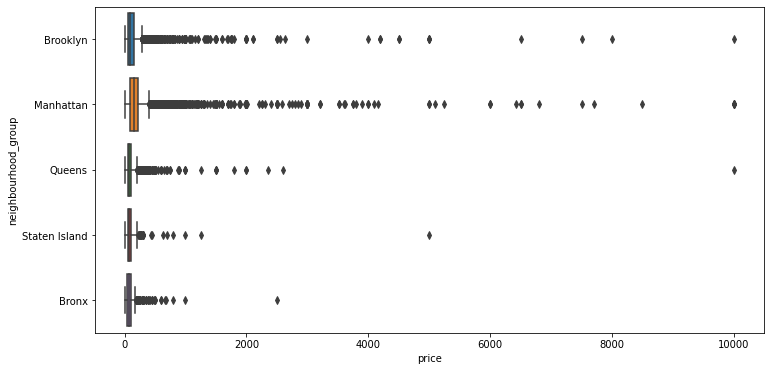

In [20]:
# try to check price in different locations
plt.figure(figsize=(12,6))
sns.boxplot(y='neighbourhood_group', x='price', data=airbnb_df)

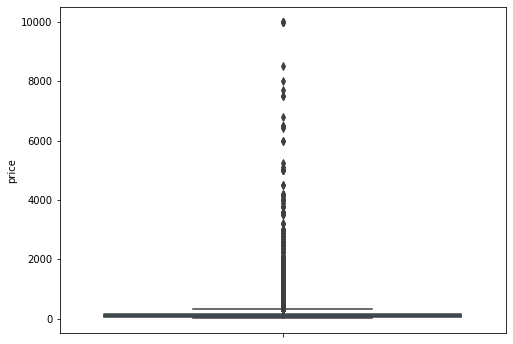

In [21]:
# Creating boxplot for price variable
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y = airbnb_df['price']) #try to drow price chart

In [22]:
# try to check count of reviews for room type
review_per_roomtype=airbnb_df.groupby('room_type')['number_of_reviews'].count()
review_per_roomtype


room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: number_of_reviews, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

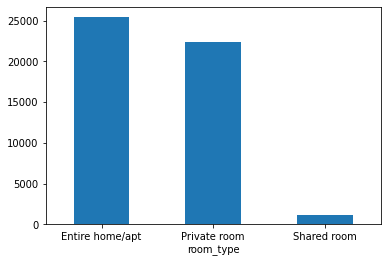

In [23]:
# try to show these details in bar ploit
review_per_roomtype.plot(kind='bar')
plt.xticks(rotation ='horizontal')

Most of the people prefers entire apt on the basis of reviews as they want privacy 

In [24]:
# table showing the data relation between night stay and room type
room__type_min_night=airbnb_df.groupby('room_type')['minimum_nights'].mean().reset_index()
room__type_min_night

,room_type,minimum_nights
0,Entire home/apt,8.507262
1,Private room,5.379004
2,Shared room,6.434370


Text(0.5, 0, 'room type')

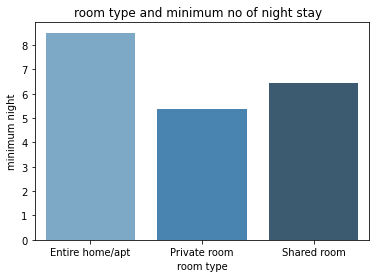

In [25]:
#Plot for room type and mean of minimum_nights
visual=sns.barplot(x='room_type',y='minimum_nights',data=room__type_min_night,palette="Blues_d")
visual.set_title('room type and minimum no of night stay  ')
visual.set_ylabel('minimum night')
visual.set_xlabel('room type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'hosts per Neighbourhood Group')

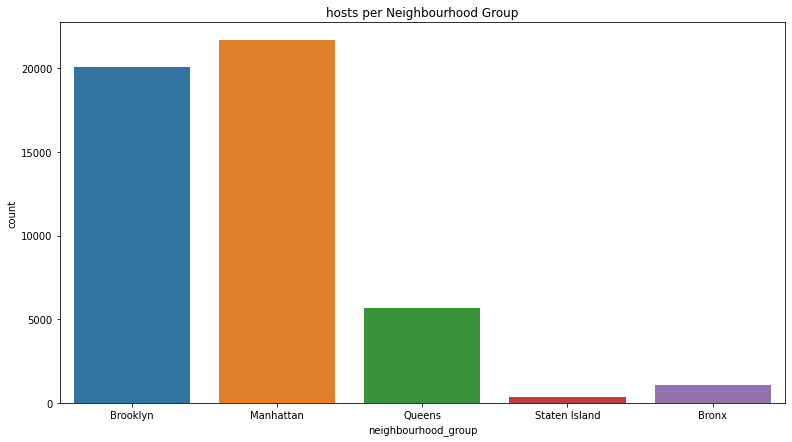

In [26]:
#plot of hosts per Neighbourhood Group
plt.figure(figsize=(13,7))
title = 'hosts per Neighbourhood Group'
sns.countplot(airbnb_df['neighbourhood_group'])
plt.title(title)


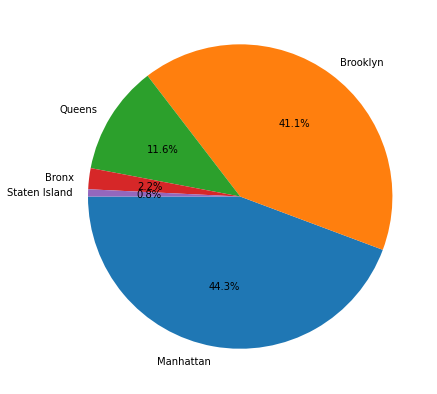

In [27]:
#use py chart for hosts per Neighbourhood Group
plt.figure(figsize=(13,7))
plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()



*   Graph shows the highest 21642 (aprrox 44% )hosts available in Manhattan
*  Graph shows the second highest 20080 (approx 41%) hosts available in Brooklyn
*   It can be clearly seen that majority of hosts are from these two areas alone
*    We need to work more on branding,discounts and offers in these two areas



In [28]:
#count of reviews per location

reviews_locations=airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].count().reset_index()
reviews_locations

,neighbourhood_group,number_of_reviews
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


In [29]:
#finding the costly neighbourhood group for the giving room type
costly_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
costly_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Manhattan is most expensive for the all of the given room types.After surfing it on net & map we find it's situated at mid of the country so more denser and it also have important financial status, so movement of finacial act happend here.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

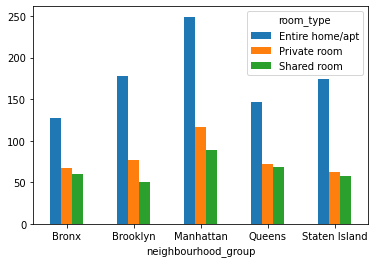

In [30]:
# Plot for finding the costly neighbourhood_group
costly_neighbourhood_group.plot(kind='bar')
plt.xticks(rotation ='horizontal')

In [31]:
#ROOM TYPE IN EACH NEIGHBOURHOOD GROUP
room_type_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

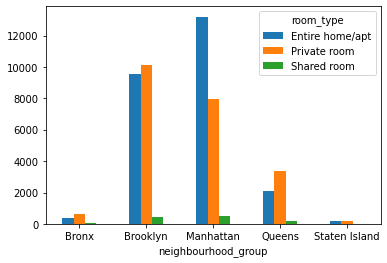

In [32]:
# Plot for room type and neighbourhood_group
room_type_neighbourhood_group.plot(kind='bar')
plt.xticks(rotation ='horizontal')

Plot clearly says that shared room are least populated.that most of the people select privacy and safety over the less price.



In [33]:
#find the most busy neighbourhood group
most_busy_neighbour_group=airbnb_df.groupby(['neighbourhood_group'])['reviews_per_month'].count().reset_index()
most_busy_neighbour_group

,neighbourhood_group,reviews_per_month
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


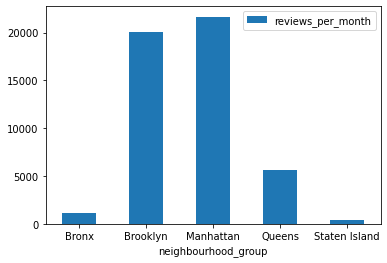

In [34]:
most_busy_neighbour_group.plot(x='neighbourhood_group',y='reviews_per_month',kind='bar')
plt.xticks(rotation="horizontal")
plt.show()

Manhatten is the busiest neighbourhood on basis of reviews followed by Brooklyn

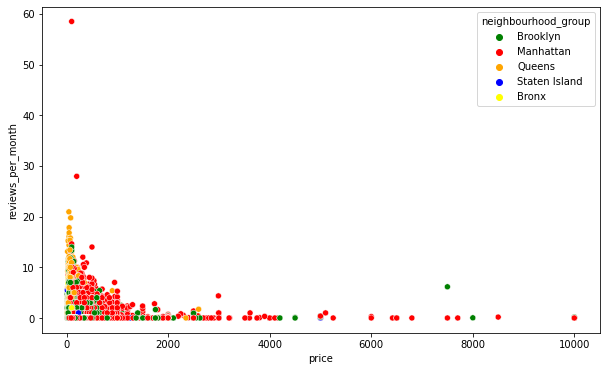

In [35]:
#scatter plot with outlier for diffrent neighbourhood_group
plt.figure(figsize=(10,6))
price_vs_review_graph=sns.scatterplot(x='price',y='reviews_per_month',hue='neighbourhood_group',palette=['green','red','orange','blue','yellow'],legend='full',data=airbnb_df)
price_vs_review_graph

From the above plot we can understand that reviews and price is in a negative correlation.i.e lesser the price of property more people will come to stay hence more reviews  

#Busiest Hosts

In [36]:
# Creating table for the most call host
host_with_most=airbnb_df[['host_name','calculated_host_listings_count']]
sorted_host_with_most=host_with_most.sort_values('calculated_host_listings_count',ascending=False)
first_three_top=sorted_host_with_most.drop_duplicates(subset=['host_name','calculated_host_listings_count'],keep='first')
final_data=first_three_top[0:3]
final_data



,host_name,calculated_host_listings_count
41415,Sonder (NYC),327
39436,Blueground,232
18797,Kara,121


Text(0.5, 0, 'host_name')

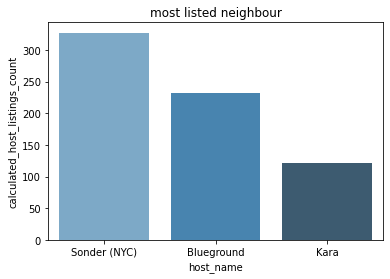

In [37]:
# Plot for most listing host
visual=sns.barplot(x='host_name',y='calculated_host_listings_count',data=final_data,palette="Blues_d")
visual.set_title('most listed neighbour')
visual.set_ylabel('calculated_host_listings_count')
visual.set_xlabel('host_name')


After doing some google research we found that sonder is hotel chain company which used airbnb for listing its property.it's hotel is based on manhatten mostly seven district which is given below ..

In [38]:
# Blueground data explore
Sonder=airbnb_df[airbnb_df['host_name']=='Sonder (NYC)']

#ROOM TYPE IN Sonder (NYC) host
sonder_rooms=Sonder.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
sonder_rooms

room_type,Entire home/apt,Private room
neighbourhood_group,,
Manhattan,319,8


(array([0]), <a list of 1 Text major ticklabel objects>)

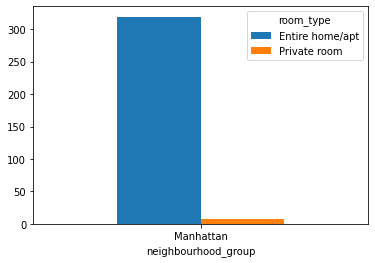

In [39]:
# Plot for room type in neighbourhood_group
sonder_rooms.plot(kind='bar')
plt.xticks(rotation ='horizontal')

Sonder (NYC)	

*   In Sonder (NYC)	have 327 listing.
*  All listing are avalible in "manhattan" only.
* Sonder (NYC) have 319 Entire home/apt.
* And Sonder (NYC) have 8 Private room

In [40]:
# Blueground data explore
blueground_rooms=airbnb_df[airbnb_df['host_name']=='Blueground']
blueground_rooms=blueground_rooms.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
blueground_rooms

room_type,Entire home/apt
neighbourhood_group,
Brooklyn,2
Manhattan,230


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

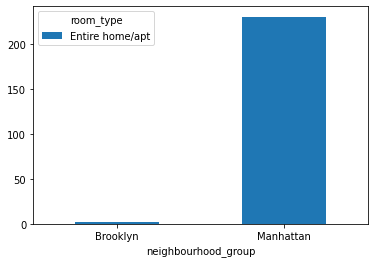

In [41]:
# Plot for room type in neighbourhood_group
blueground_rooms.plot(kind='bar')
plt.xticks(rotation ='horizontal')

Blueground	

*   Blueground	have 232 listing.
*  230 listing are avalible in "manhattan".
*  2 listing are avalible in "Brooklyn".
* Blueground have all 232 Entire home/apt.

In [42]:
# Kara data explore
Kara=airbnb_df[airbnb_df['host_name']=='Kara']

#ROOM TYPE IN Kara host
kara_rooms=Kara.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()

# we have few null values by using groupby function
kara_rooms=kara_rooms.fillna({'Entire home/apt':0})
kara_rooms


room_type,Entire home/apt,Private room
neighbourhood_group,,
Brooklyn,5.0,1.0
Manhattan,129.0,6.0
Queens,0.0,2.0


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

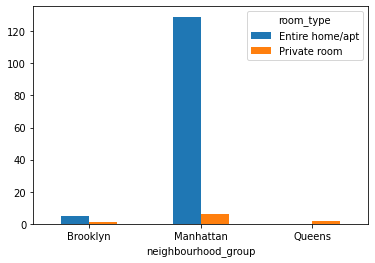

In [43]:
#try to make a bar chat for easilly understanding
kara_rooms.plot(kind='bar')
plt.xticks(rotation ='horizontal')


KARA

* KARA have 121 listing.
* 135 listing are avalible in "manhattan" with 6 Private room and 129 Entire home/apt.
* 6 listing are avalible in "Brooklyn" with 1 Private room and 5 Entire home/apt.
*  2 listing are avalible in "Queens" with all 2 Entire home/apt .

In [44]:
#for analyis the data granularly we creat a each of the neighbourhood group function
nbgh_manhattan=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan'].reset_index()
nbgh_Bronx=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx'].reset_index()
nbgh_Brooklyn=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn'].reset_index()
nbgh_Queens=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens'].reset_index()
nbgh_Staten_Island=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island'].reset_index()

In [45]:
#sorting it by price for each neighbourhood group
most_expensiv_neighbourhood_manhattan=nbgh_manhattan.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Bronx=nbgh_Bronx.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Brooklyn=nbgh_Brooklyn.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Queens=nbgh_Queens.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
most_expensiv_neighbourhood_Staten_Island=nbgh_Staten_Island.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)

In [46]:
#now code for finding top three neighbourhood from each group
top_three_manhattan=most_expensiv_neighbourhood_manhattan[0:3].reset_index()
top_three_Bronx=most_expensiv_neighbourhood_Bronx[0:3].reset_index()
top_three_Brooklyn=most_expensiv_neighbourhood_Brooklyn[0:3].reset_index()
top_three_Queens=most_expensiv_neighbourhood_Queens[0:3].reset_index()
top_three_Staten_Island=most_expensiv_neighbourhood_Staten_Island[0:3].reset_index()

In [47]:
table_top_three_neighbourhood_group=pd.concat([top_three_manhattan,top_three_Bronx,top_three_Brooklyn,top_three_Queens,top_three_Staten_Island],axis=0)

In [48]:
table_top_three_neighbourhood_group.reset_index()

,level_0,index,neighbourhood_group,neighbourhood,price
0,0,26,Manhattan,Tribeca,490.638418
1,1,0,Manhattan,Battery Park City,367.557143
2,2,7,Manhattan,Flatiron District,341.925000
3,0,34,Bronx,Riverdale,442.090909
4,1,5,Bronx,City Island,173.000000
5,2,37,Bronx,Spuyten Duyvil,154.750000
6,0,40,Brooklyn,Sea Gate,487.857143
7,1,14,Brooklyn,Cobble Hill,211.929293
8,2,8,Brooklyn,Brooklyn Heights,209.064935
9,0,36,Queens,Neponsit,274.666667


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 576x360 with 0 Axes>

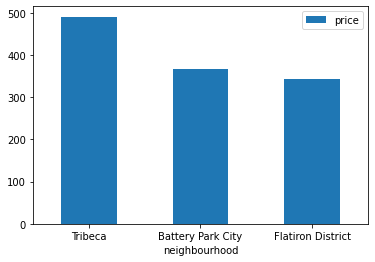

In [49]:
#Plot manhattan top three ..
plt.figure(figsize=(8,5))
top_three_manhattan.plot(x='neighbourhood',y='price',kind='bar')
plt.xticks(rotation ='horizontal')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 576x360 with 0 Axes>

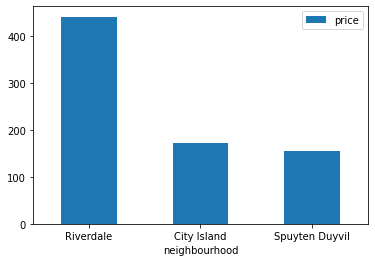

In [50]:
# Plot for Bronx top three
plt.figure(figsize=(8,5))
top_three_Bronx.plot(x='neighbourhood',y='price',kind='bar')
plt.xticks(rotation ='horizontal')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 576x360 with 0 Axes>

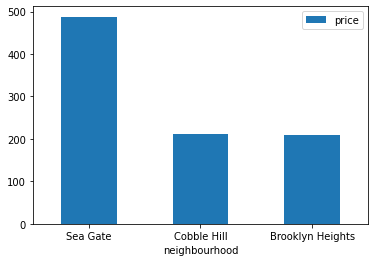

In [51]:
# Plot for Brooklyn top three
plt.figure(figsize=(8,5))
top_three_Brooklyn.plot(x='neighbourhood',y='price',kind='bar')
plt.xticks(rotation ='horizontal')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 576x360 with 0 Axes>

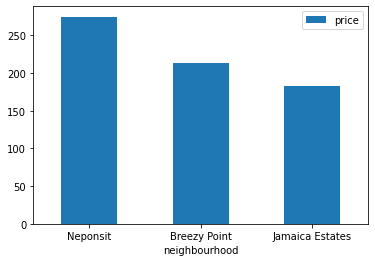

In [52]:
# Plot for Queens top three
plt.figure(figsize=(8,5))
top_three_Queens.plot(x='neighbourhood',y='price',kind='bar')
plt.xticks(rotation ='horizontal')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 576x360 with 0 Axes>

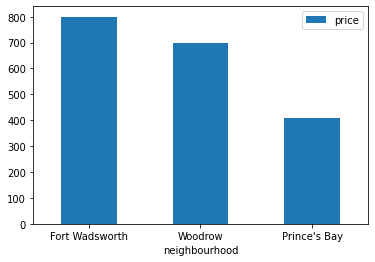

In [53]:
# Plot for Staten_Island top three
plt.figure(figsize=(8,5))
top_three_Staten_Island.plot(x='neighbourhood',y='price',kind='bar')
plt.xticks(rotation ='horizontal')

In [54]:
# room type availabilty relation
room_type_avail=airbnb_df.groupby('room_type')['availability_365'].mean().reset_index()
room_type_avail

,room_type,availability_365
0,Entire home/apt,111.926241
1,Private room,111.203638
2,Shared room,161.873057


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

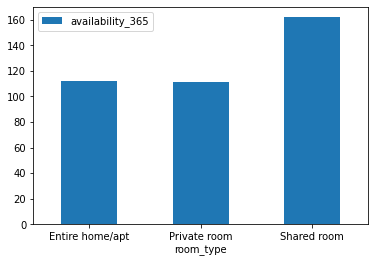

In [55]:
plt.figure(figsize=(10,5))
visual=room_type_avail.plot(x='room_type',y='availability_365',kind='bar')
plt.xticks(rotation ='horizontal')

Inside the Neighbourhood

In [56]:
#fining the top ten neighbourhood
airbnb_df.neighbourhood.value_counts().head(11).reset_index()

,index,neighbourhood
0,Williamsburg,3919
1,Bedford-Stuyvesant,3710
2,Harlem,2658
3,Bushwick,2462
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


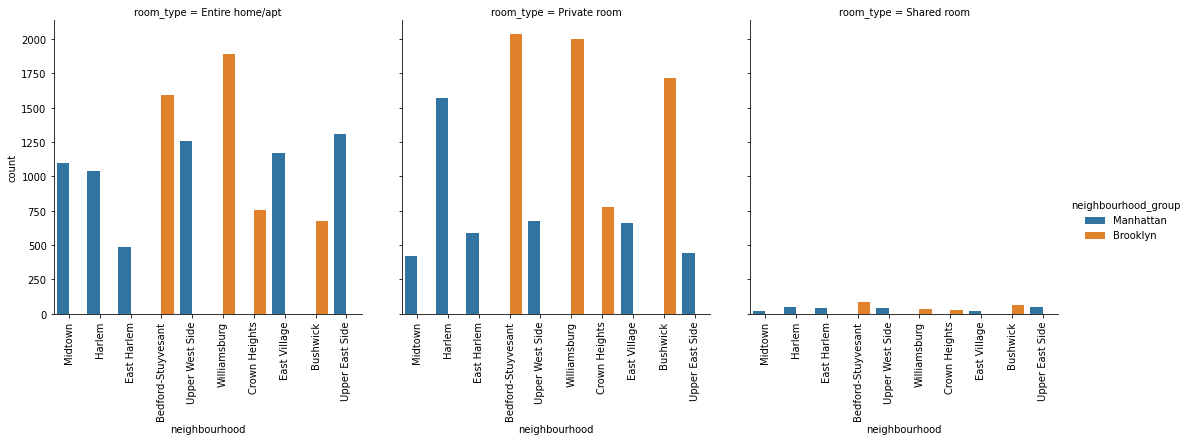

In [57]:
#combine this data with roomtype for enhance the visualisation
sub_data2=airbnb_df.loc[airbnb_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\s kitchen','East Village','Upper East Side','Crown Heights','Midtown','East Harlem'])]
#using catplot to represnting mutltiple atribute together
visual=sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=sub_data2,kind='count')
visual.set_xticklabels(rotation=90)

We can see from the above three sub plots that we can make comparision between distribution of attributes.The y-axis and x-axis are same in both the plot, in the y-axis we are taking count and on the x-axis we taking observation. There are two more important element first is column and second is hue, after specifying the column and determining the hue we are able to compare and observe the y-axis and x-axis among the specified column as well colour-code. We observerd that the shared room type have less number of intrest.we had seen from the top 10 neighbourhood only Manhattan and Brooklyn are the most travel destination therefore it would have the most listing availability.we can also see that Bedford-stuyvesent and williamsburg are more populated than Manhattan and harlem from Brooklyn

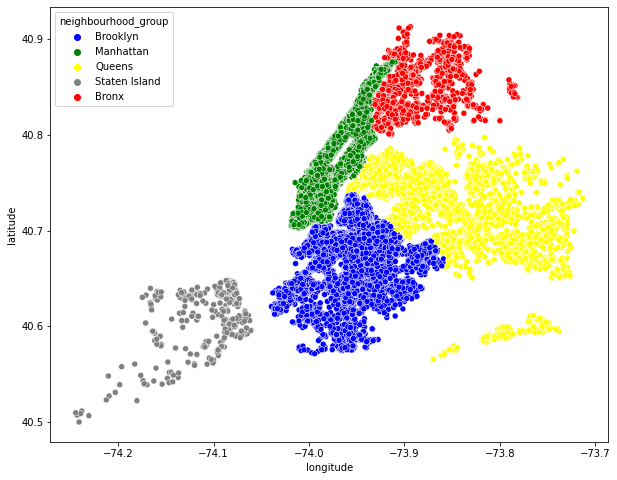

In [58]:
# now take some insights from longitude and latitude
#let's draw scatter plot 
plt.figure(figsize=(10,8))
visual=sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['blue','green','yellow','grey','red'], legend='full',data=airbnb_df)

At the End of jouney we have extracted some useful insights from the given data. so, now we can give suggestion to Airbnb CEO with some Exquisite conclusion

*Most airbnb is located in Manhattan and Brooklyn. Due to capital income state Manhattan is most Expensive.

*Correlation graph shows that in the U.S people prefer privacy than the price, so the private room and entire home are most preferable room type.shared rooms are least preferred.

*Correlation between price and review shows that people prefer afforable rooms and thus reviews are more at less price
